## RRT 과정
1. 트리를 초기화 한다. (출발 노드(𝒒_𝒊𝒏𝒊)를 트리로 넣는다.)
2. 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)를 한 개 생성한다.
3. 가장 가까운 노드 (𝒒_𝒏𝒆𝒂𝒓)를 찾는다.
4. 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)방향으로 연결한 직선상에 일정한 거리(𝜸)만큼 떨어진 새로운 노드(𝒒_𝒏𝒆𝒘) 선정한다. 
5. 만약 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 새로운 노드(𝒒_𝒏𝒆𝒘)까지 직선으로 연결한 선이 장애물과 충돌하지 않으면 새로운 노드(𝒒_𝒏𝒆𝒘)를 트리로 넣는다.
6. 목표 노드에 도달할 때까지 2~5 과정을 반복한다.


---------------------------------------------------------------------------

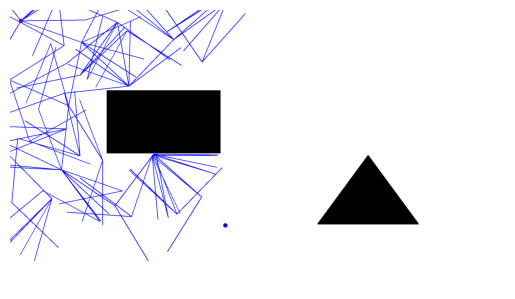

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import cv2

class point:
    x: int = None
    y: int = None


def calDist(p1, p2):
    return np.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)


def point_circle_collision(p1, p2, radius, map_img):
    distance = calDist(p1, p2)
    if distance <= radius:
        # 두 점 사이의 거리가 반지름 이하이면 충돌
        if set(map_img[p1.x, p1.y]) == set([0, 0, 0]):
            return True
    return False


def collision_with_obstacle(p1, p2, map_img, radius):
    map_gray = cv2.cvtColor(map_img, cv2.COLOR_RGB2GRAY)
    num_points_to_check = int(calDist(p1, p2) // radius)

    for i in range(num_points_to_check + 1):
        t = i / num_points_to_check
        x = int(p1.x * (1 - t) + p2.x * t)
        y = int(p1.y * (1 - t) + p2.y * t)

        if map_gray[y, x] < 255:
            return True

    return False


map_ori = cv2.imread('map.png')
map_ori = cv2.cvtColor(map_ori, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(map_ori)

q_start = point()
q_start.x, q_start.y = 50, 50
q_goal = point()
q_goal.x, q_goal.y = 1000, 1000

map = cv2.circle(map_ori.copy(), (q_start.x, q_start.y), 10, (255, 0, 0), -1)
map = cv2.circle(map, (q_goal.x, q_goal.y), 10, (0, 0, 255), -1)
# 트리를 초기화 한다. (출발 노드(𝒒_𝒊𝒏𝒊)를 트리로 넣는다.)
tree = [q_start]

for i in range(150):
    q_rand = point()
    # 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)를 한 개 생성한다.
    q_rand.x, q_rand.y = np.random.randint(0, 1000), np.random.randint(0, 1000)
    q_near = tree[0]
    # 가장 가까운 노드 (𝒒_𝒏𝒆𝒂𝒓)를 찾는다.
    min_dist = calDist(q_rand, q_near)
    # q_near에서 q_rand 방향으로 일정 거리만큼 떨어진 새로운 노드 선택
    for q in tree:
        dist = calDist(q_rand, q)
        if dist < min_dist:
            min_dist = dist
            q_near = q

    gamma = 300
    # math.atan2(y, x)
    theta = math.atan2(q_rand.y - q_near.y, q_rand.x - q_near.x)
    # 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 샘플 노드(𝒒_𝒓𝒂𝒏𝒅)방향으로 연결한 직선상에 일정한 거리(𝜸)만큼 떨어진 새로운 노드(𝒒_𝒏𝒆𝒘) 선정한다.
    q_new = point()
    q_new.x = int(q_near.x + gamma * math.cos(theta))
    q_new.y = int(q_near.y + gamma * math.sin(theta))

    if point_circle_collision(q_new, q_near, 10, map_ori):
        continue

    if collision_with_obstacle(q_near, q_new, map_ori, 10):
        continue
    # 만약 가장 가까운 노드(𝒒_𝒏𝒆𝒂𝒓)에서 새로운 노드(𝒒_𝒏𝒆𝒘)까지 직선으로 연결한 선이 장애물과 충돌하지 않으면 새로운 노드(𝒒_𝒏𝒆𝒘)를 트리로 넣는다.
    tree.append(q_new)
    map = cv2.line(map, (q_near.x, q_near.y), (q_new.x, q_new.y), (0, 0, 255), 2)

plt.imshow(map)
plt.show()
